In [83]:
from sklearn.cluster import MiniBatchKMeans
import os 
import cv2
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
pca = PCA(2)

In [13]:
path = "/home/jechterh/teams/group-9/datasetGAN_2000_generations_masks/"
path = "/home/jechterh/teams/group-9/nih_data/"


In [71]:
images = []
imagenames = []
for i, image in tqdm.tqdm(enumerate(os.listdir(path))):
    if "mask" in image or "jpg" not in image: continue
    imagenames.append(image)
    im = cv2.imread(path + image)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    pixel_values = im.reshape((256*256*3))
    images.append(pixel_values)
    #if i > 2: break

4001it [00:02, 1349.66it/s]


In [64]:
X_unprocessed = np.array(images)

In [39]:
X_train = np.array(images)

In [49]:
#Transform the data
X_train = pca.fit_transform(X_train)

In [50]:
total_clusters = 1
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
label = kmeans.fit_predict(X_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7feab6511c10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


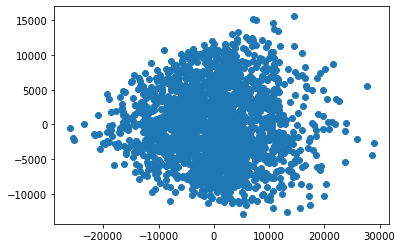

In [51]:

plt.scatter(X_train[:,0], X_train[:,1])

In [59]:
def get_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return (s>m).nonzero()

In [61]:
outliers = get_outliers(X_train, m = 2.)

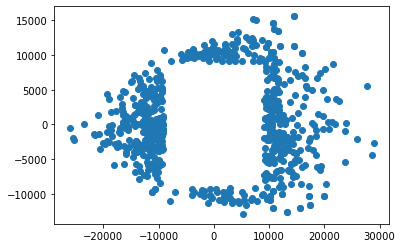

In [62]:
plt.scatter(X_train[outliers[0]][:,0], X_train[outliers[0]][:,1])

In [63]:
X_train[outliers[0]].shape

(659, 2)

In [65]:
cv2.imshow(X_unprocessed[outliers[0][0]])

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


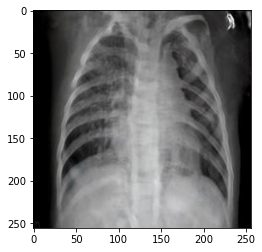

In [70]:
plt.imshow(X_unprocessed[outliers[0][0]].reshape((256,256,3)))

In [74]:
outlier_images = np.array(imagenames)[outliers[0]]

In [85]:
pd.DataFrame(outlier_images).to_csv("outliers.csv")